---
title: Resultados da Avaliação
format: pdf
execute:
    echo: false
    warning: false
---

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from dotenv import dotenv_values
from os.path import abspath

envVals = dotenv_values('../.env')

plt.ion()

def despine(ax):
  # Hiding spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # Setting
  ax.yaxis.set_ticks_position('left')
  ax.xaxis.set_ticks_position('bottom')

In [15]:
# Abrindo indicadores em um DataFrame
dataPath = abspath('../data') + '/' + envVals['TICKER'] + '.json'
indicadoresDf = pd.read_json(dataPath)

# Abrindo histórico de cotações da ação em um segundo DataFrame
yahooTicker = envVals['TICKER'] + '.SA'

tk = yf.Ticker(yahooTicker)
tickerDf = tk.history('5y')


## Histórico de preços da ação

Demonstrativo de histórico de preços da ação nos períodos: 5 dias, 1 mês, 6 meses, 1 ano e 5 anos.

In [16]:
day5 = tk.history('5d')
m1 = tk.history('1mo')
m3 = tk.history('3mo')
m6 = tk.history('6mo')
y1 = tk.history('1y')
y5 = tk.history('5y')

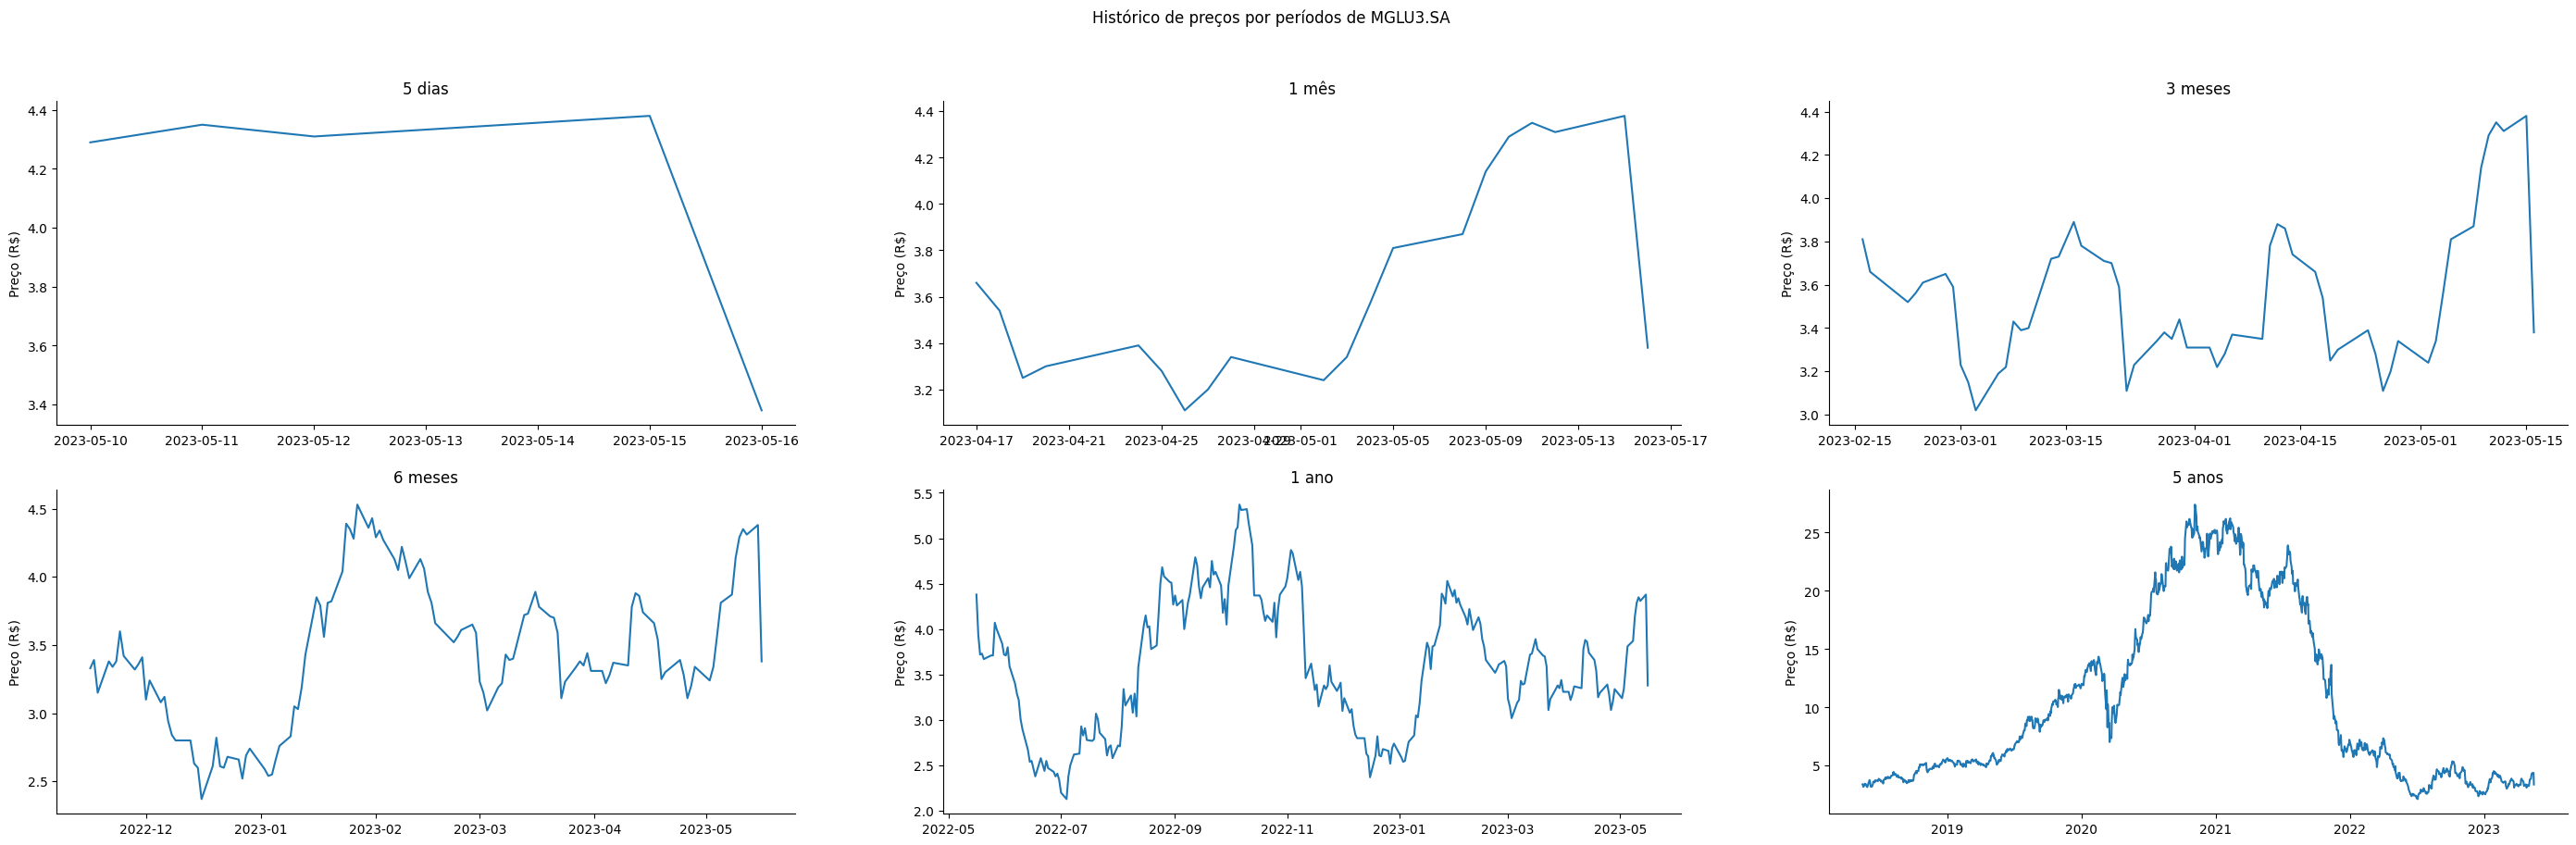

In [17]:
dados = [day5['Close'], m1['Close'], m3['Close'], m6['Close'], y1['Close'], y5['Close']]

names = ['5 dias', '1 mês', '3 meses', '6 meses', '1 ano', '5 anos']

fig, vax = plt.subplots(2, 3)

fig.suptitle(f'Histórico de preços por períodos de {yahooTicker}')

fig.set_figwidth(35)
fig.set_figheight(10)

for ax, data, name in zip(vax.flat, dados, names):
    despine(ax)
    
    ax.set_title(name)
    ax.set_ylabel('Preço (R$)')
    
    ax.plot(data)


plt.show()

## Histórico de Indicadores Fundamentalistas

Os gráficos à seguir tem a intenção de detalhar o histórico de alguns indicadores fundamentalistas referentes ao Ticker em questão. (P/L, DY, VPA, P/VP) 

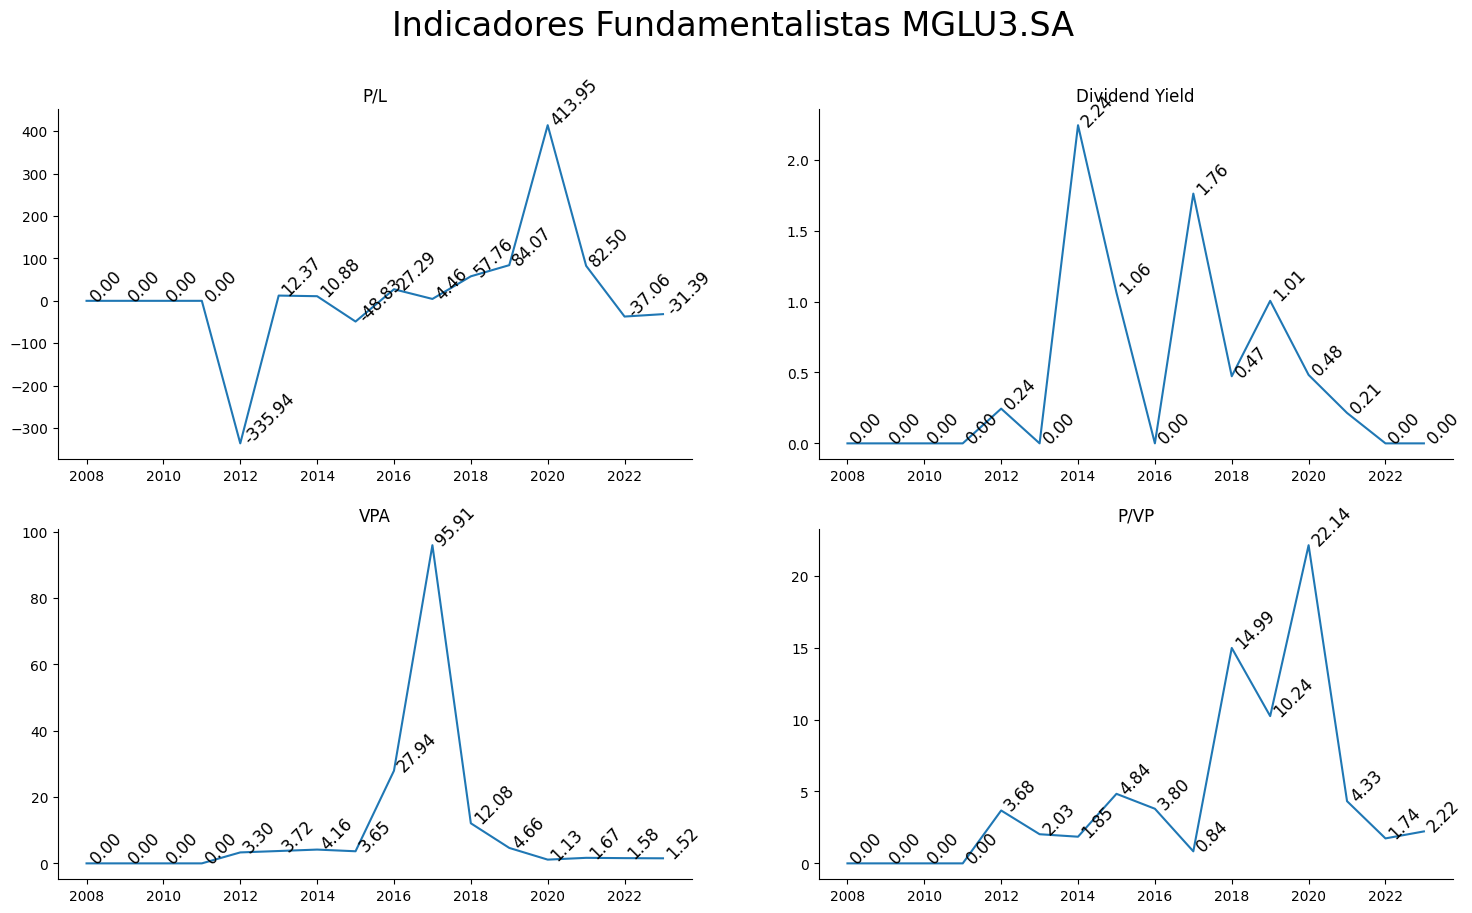

In [18]:
indexes = ['P/L', 'Dividend Yield', 'VPA', 'P/VP']

valores = [pd.DataFrame(indicadoresDf[i]['series']) for i in indexes]

fig, vax = plt.subplots(2, 2)

fig.set_figwidth(18)
fig.set_figheight(10)

fig.suptitle(f'Indicadores Fundamentalistas {yahooTicker}', fontsize=24)

for ax, data, name in zip(vax.flat, valores, indexes):
    data['value'] = data['value'].fillna(0)
    despine(ax)
    ax.set_title(f'{name}')
    ax.plot(data['year'], data['value'])

    for i in range(len(data)):
        ax.text(data['year'][i], round(data['value'][i], 2), f'{data["value"][i]:.2f}' , size=12, rotation=45)


plt.show()

## Margem EBIT comparada com Dívida Líquida/EBIT

Comparativo entre as margens de lucro da empresa com a Dívida líquida/EBIT. 

/tmp/ipykernel_12410/755474912.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


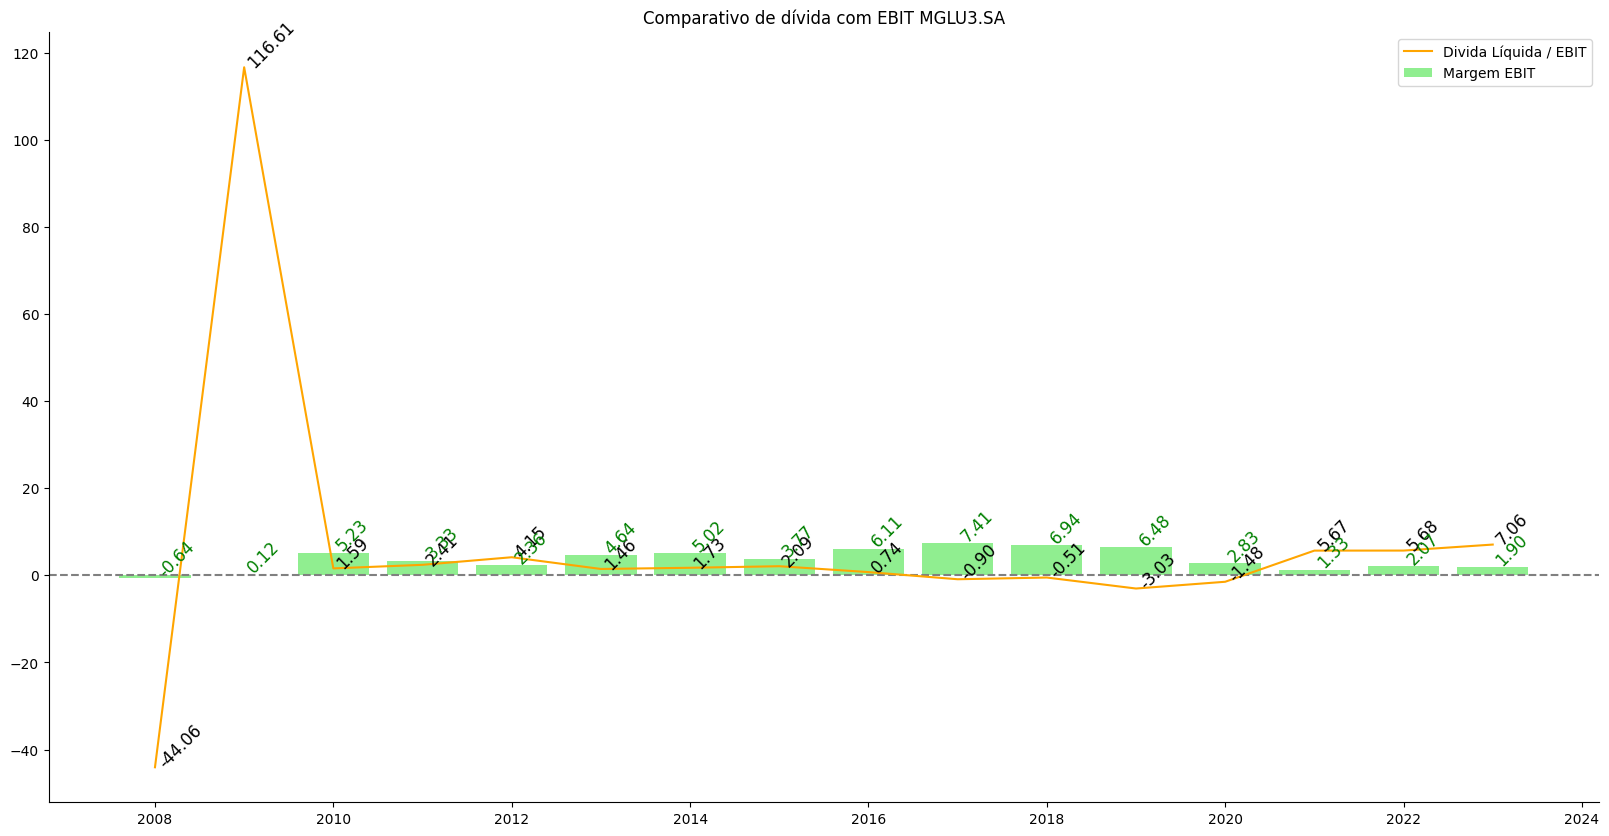

In [19]:
ebitHist = pd.DataFrame(indicadoresDf['Dívida Líquida/EBIT']['series'])
ebit = pd.DataFrame(indicadoresDf['Margem EBIT']['series']).dropna()

fig, ax = plt.subplots()

fig.set_figheight(10)

ax.bar(ebit['year'], ebit['value'], color='lightgreen', label='Margem EBIT')
ax.axhline(y=0, linestyle='dashed', color='grey')

ax.plot(ebitHist['year'], ebitHist['value'], color='orange' ,label='Divida Líquida / EBIT')

for i in range(len(ebitHist)):
    ax.text(ebitHist['year'][i], round(ebitHist['value'][i], 2), f'{ebitHist["value"][i]:.2f}' , size=12, color='black', rotation=45)


for i in range(len(ebit)):
    ax.text(ebit['year'][i], (ebit['value'][i]) + 0.5, f'{ebit["value"][i]:.2f}' , size=12, color='green', rotation=45)

despine(ax)

ax.legend()

ax.set_title(f'Comparativo de dívida com EBIT {yahooTicker}')
fig.set_figwidth(20)
fig.show()

## Indicadores de Reinvestimento da empresa:

Demonstrativo de indicadores de Reinvestimento e capacidade de crescimento da empresa. Os indicadores em questão são: 

/tmp/ipykernel_12410/1115031861.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


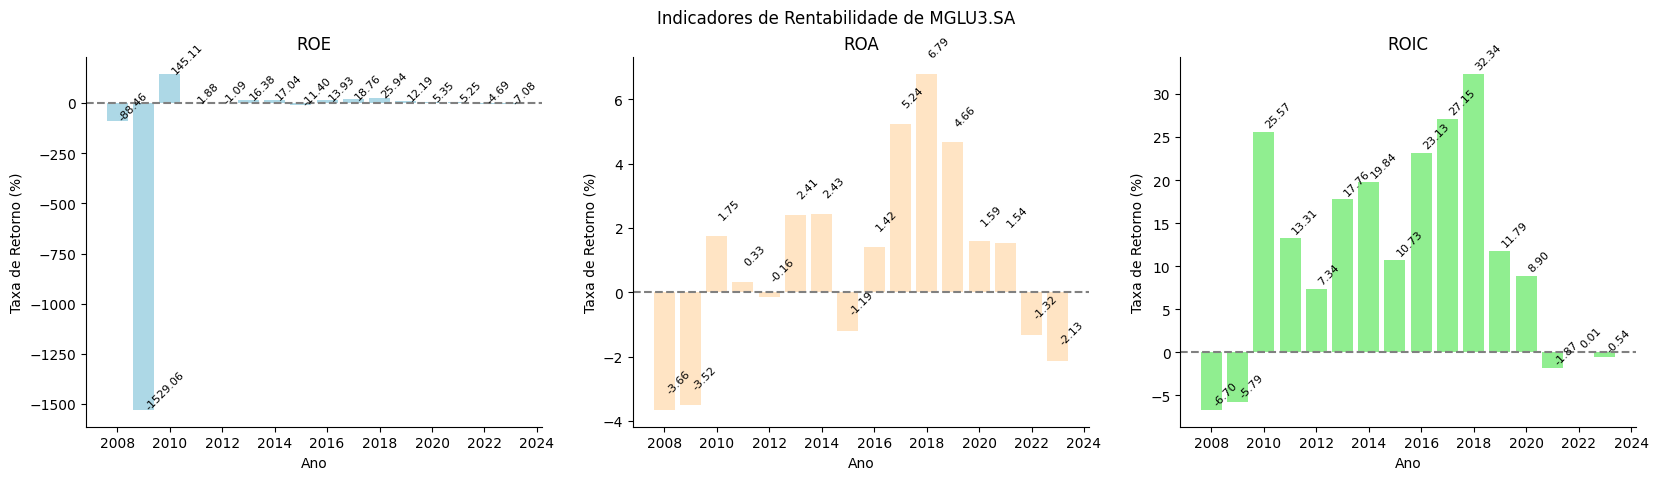

In [20]:
nomes = ['ROE', 'ROA', 'ROIC']
dados = []
colors = ['lightblue', 'bisque', 'lightgreen']

for i in nomes:
    dados.append(pd.DataFrame(indicadoresDf[i]['series']))

fig, vax = plt.subplots(1, 3)

for ax, name, data, c in zip(vax.flat, nomes, dados, colors):

    # Plotagem de informações
    ax.bar(data['year'], data['value'], color=c)

    # Texto com valores:
    for i in range(len(data['value'])):
        ax.text(data['year'][i], (data['value'][i] + 0.5), f'{data["value"][i]:.2f}' , size=8, rotation=45)

    # Definão de estilos
    ax.axhline(y=0, color='gray', linestyle='dashed')
    despine(ax)

    # Definição de Legedas:
    ax.set_title(name)
    ax.set_ylabel('Taxa de Retorno (%)')
    ax.set_xlabel('Ano')

fig.suptitle(f'Indicadores de Rentabilidade de {yahooTicker}')
fig.set_figwidth(20)
fig.show()

## Cálculo do valor pelo método de Graham

O método de Graham utiliza de dois indicadores fundamentalistas: $LPA$ e $VPA$, para realizar o cálculo do "Valor Justo" de uma ação, ou seja, o valor que ela deveria ter de acordo com seus indicadores fundamentalistas. O cálculo é realizado através da seguinte fórmula:

$$
\sqrt{22.5 * LPA * VPA}
$$

Além disso, é calculada também uma margem de segurança em relação ao preço ideal de uma ação, que é um decréscimo de 15-30% do valor ideal. O valor de margem de segurança é subjetivo, e deve variar de acordo com a empresa.

In [21]:
graham = np.sqrt(22.5 * indicadoresDf['VPA']['currentValue'] * indicadoresDf['LPA']['currentValue'])

safetyMargin = graham - float(envVals['SAFETY']) * graham
safetyMargin20 = graham - 0.2 * graham

safetypercent = float(envVals['SAFETY']) * 100

/tmp/ipykernel_12410/2192081634.py:1: RuntimeWarning: invalid value encountered in sqrt
  graham = np.sqrt(22.5 * indicadoresDf['VPA']['currentValue'] * indicadoresDf['LPA']['currentValue'])


Text(0.5, 0.98, 'Análise de Graham MGLU3.SA')

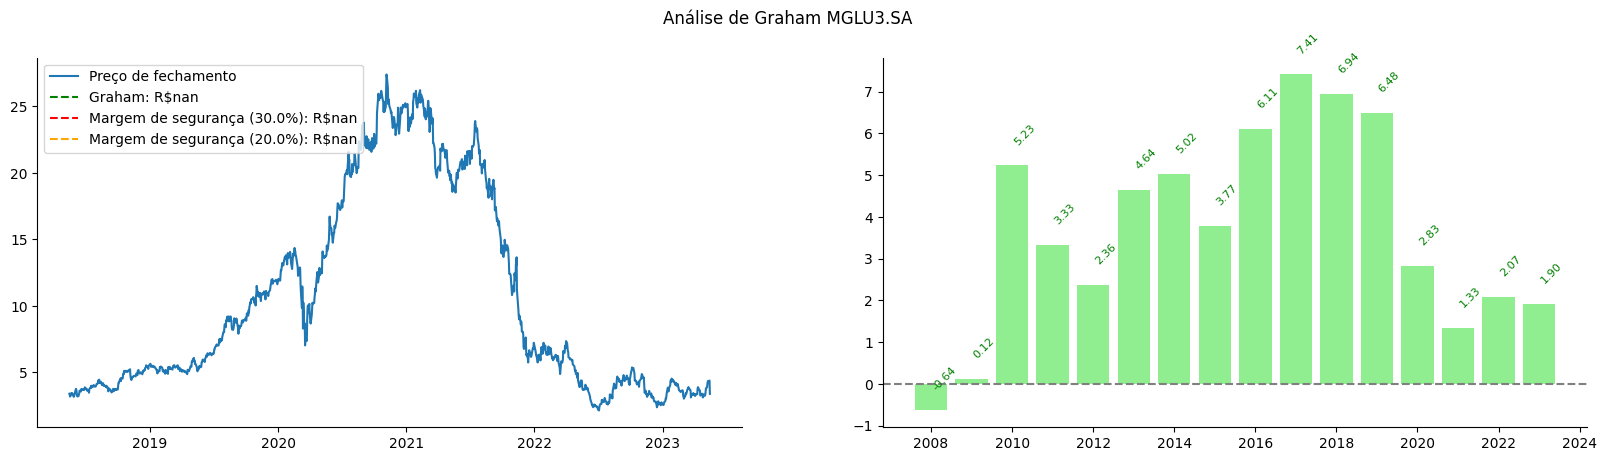

In [22]:

fig, ax= plt.subplots(1, 2)

fig.set_figwidth(20)

# Plotando valor de Graham atual vs Cotação
despine(ax[0])

ax[0].plot(tickerDf['Close'], label='Preço de fechamento')

ax[0].axhline(y=graham, color='green', linestyle='dashed', label=f'Graham: R${graham:.2f}')
ax[0].axhline(y=safetyMargin, color='red', linestyle='dashed', label=f'Margem de segurança ({safetypercent}%): R${safetyMargin:.2f}')

ax[0].axhline(y=safetyMargin20, color='orange', linestyle='dashed', label=f'Margem de segurança (20.0%): R${safetyMargin20:.2f}')

ax[0].legend()

# Plot de margem EBIT
ax[1].bar(ebit['year'], ebit['value'], color='lightgreen', label='Margem EBIT')
ax[1].axhline(y=0, linestyle='dashed', color='grey')

despine(ax[1])

for i in range(len(ebit)):
    ax[1].text(ebit['year'][i], (ebit['value'][i]) + 0.5, f'{ebit["value"][i]:.2f}' , size=8, color='green', rotation=45)

fig.suptitle(f"Análise de Graham {yahooTicker}")
